In [106]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pypsa
import matplotlib.patches as mpatches

In [107]:
red1 = '#891D2D'
red2 = '#BA3B31'
orange = '#F58221'
yellow = '#FCAF19'
brown = '#440A15'
purple1 = '#3B1053'
purple2 = '#76518E'
purple3 = '#B69DC7'
teal1 = '#032838'
teal2 = '#154655'
teal3 = '#527D77'
teal4 = '#8DB5AF'
green1 = '#294839'
green2 = '#6E966E'
green3 = '#A3BDA3'
beige1 = '#927F48'
beige2 = '#A89677'
beige3 = '#D2CDAD'

from matplotlib.colors import ListedColormap




plt.rcParams['font.size'] = 18
zones = ['Northern', 'Oriental', 'Central', 'Southern']
zone_colors=[teal1,teal4,teal2,teal3]

# Define your custom colormap
cmap_zones = ListedColormap(zone_colors)

In [108]:
# Settings
year = 2030
weather = 2013

color = [purple2]

# Read in data
data_path = f"C:/Users/marih/test4/pypsa-earth/data/ssp2-2.6/{year}/era5_{weather}/SouthAmerica.csv"
df_demand = pd.read_csv(data_path,delimiter=';')

#display(df_demand)
demand_BO = df_demand[df_demand['region_code'] == 'BO']['Electricity demand']/1.19915 #/1.195 scale factor for the 2030 data for 2021
total_demand = demand_BO.sum()/1000000 # in TWh
print(f'The total demand in 2021 in Bolivia is {round(total_demand,3)} TWh, based on the weather data from 2013')


""" #Plots
demand_BO.iloc[:745].plot(color=color, figsize = (8,4))
plt.ylabel('Hourly load in MWh')
plt.title(f'Load pattern in January {year} in Bolivia')
plt.show()
demand_BO.iloc[:169].plot(color=color, figsize = (8,4))
plt.ylabel('Hourly load in MWh')
plt.title(f'Load pattern in the first week of January {year} in Bolivia') """


t_70 = 1043
t_80 = 1192
t_90 = 1341
demand_BO.max()

count_above_threshold = (demand_BO > t_90).sum()
count_above_threshold

The total demand in 2021 in Bolivia is 9.455 TWh, based on the weather data from 2013


205

In [109]:
demand_BO_2030 = df_demand[df_demand['region_code'] == 'BO']['Electricity demand']
total_demand_2030 = demand_BO_2030.sum()/1000
total_demand_2030

11338.090562443727

In [110]:
demand_projection = pd.read_excel("c:/Users/marih/test4/pypsa-earth/data/" + 'demand_scaling_factors.xlsx')
#demand_projection = demand_projection.loc['total demand [GWh]','Demand CNDC']
demand_projection


,Unnamed: 0,Year,Total demand [GWh],Scaling factor,Demand CNDC,Unnamed: 4
0,0,2021,9455,0.833921,9455,0.833921
1,1,2022,9670,0.852884,9829,0.866908
2,2,2023,9885,0.871847,10197,0.899365
3,3,2024,10099,0.890721,10504,0.926442
4,4,2025,10314,0.909684,10812,0.953607
5,5,2026,10529,0.928647,11373,1.003087
6,6,2027,10744,0.947610,11879,1.047716
7,7,2028,10958,0.966484,12407,1.094285
8,8,2029,11173,0.985447,12959,1.142971
9,9,2030,11338,1.000000,13535,1.193773


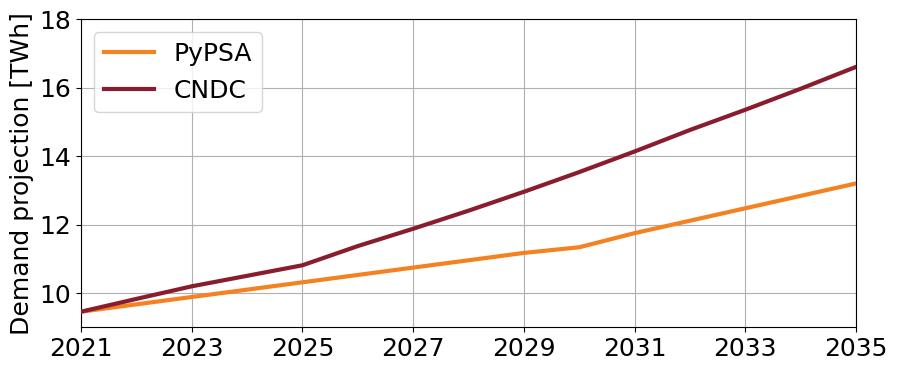

In [111]:
(demand_projection['Total demand [GWh]']/1000).plot(color=orange, linewidth = 3, figsize=(10,3.5), label = 'PyPSA', zorder = 3)
(demand_projection['Demand CNDC']/1000).plot(color=red1, linewidth = 3, figsize=(10,4), label = "CNDC", zorder = 3)

plt.legend()
plt.ylabel("Demand projection [TWh]")
plt.ylim(9,18)
plt.xlim(0,14)
plt.grid(zorder = 0)
years = np.arange(2021, 2036)
plt.xticks(ticks = np.arange(0,15)[::2], labels = years[::2])
# target_years = [2025, 2030, 2035]

# # Iterate over the target years and add text annotations
# for year in target_years:
#     value = demand_projection[years == year]  # Get the corresponding value
#     plt.text(year, value, f'{value:.2f}', ha='center', va='bottom')

plt.show()

In [112]:
n4_node82 = pypsa.Network("c:/Users/marih/test4/pypsa-earth/saved_networks/4_nodes_validation_network/results/elec_s_4_ec_lcopt_Co2L-1H.nc")
n4_node82.loads_t.p_set.sum().sum()

n_validation = n4_node82


c:\Users\marih\anaconda3\envs\pypsa-earth-test\lib\site-packages\pypsa\components.py:318: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  attrs.loc[bool_b, "default"] = attrs.loc[bool_b].isin({True, "True"})
c:\Users\marih\anaconda3\envs\pypsa-earth-test\lib\site-packages\pypsa\components.py:318: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  attrs.loc[bool_b, "default"] = attrs.loc[bool_b].isin({True, "True"})
c:\Users\marih\anaconda3\envs\pypsa-earth-test\lib\site-packages\pypsa\components.py:318: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, pleas

Load
BO0 0    3.545342e+06
BO0 1    1.342395e+06
BO0 2    2.614289e+06
BO0 3    1.953050e+06
dtype: float64

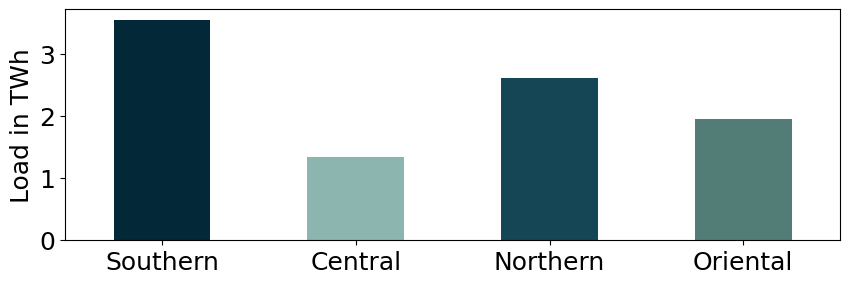

In [113]:
(n_validation.loads_t.p.sum()/1000000).plot.bar(figsize = (10,3), color = zone_colors)
plt.xticks(ticks = [0,1,2,3], labels = ['Southern','Central', 'Northern', 'Oriental'] ,rotation = 0)
plt.ylabel('Load in TWh')
plt.xlabel('')

n_validation.loads_t.p.sum()



In [114]:
load_sum = n_validation.loads_t.p.sum().sum()/1000000

old_load_sum = (2.204674e+06 + 2.929578e+06 + 2.365512e+06 + 1.955311e+06)/1000000

difference_load = load_sum - old_load_sum

print("The load sum is ", round(load_sum, 7), "TWh")

print("The load sum has changed by", round(abs(difference_load*1000), 6), "GWh")

The load sum is  9.4550756 TWh
The load sum has changed by 0.000561 GWh


In [115]:
expected_2021_scale = load_sum/total_demand_2030*1000
expected_2021_scale

0.8339213299999999

In [116]:
total_demand_2030_profile = pd.read_csv("c:/Users/marih/test4/pypsa-earth/resources/demand_profiles.csv")
total_demand_2030_profile.head()
# Calculate the total demand for each time entry
demand_data = total_demand_2030_profile
demand_data['total_demand_per_time'] = demand_data.iloc[:, 1:].sum(axis=1)

# Calculate the grand total demand across all time entries
grand_total_demand = demand_data['total_demand_per_time'].sum()

demand_data['total_demand_per_time'].head(), grand_total_demand

(0    1256.189097
 1    1194.752713
 2    1073.080959
 3     944.319413
 4     924.334962
 Name: total_demand_per_time, dtype: float64,
 9455075.56149352)

([<matplotlib.axis.YTick at 0x1efc3168730>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

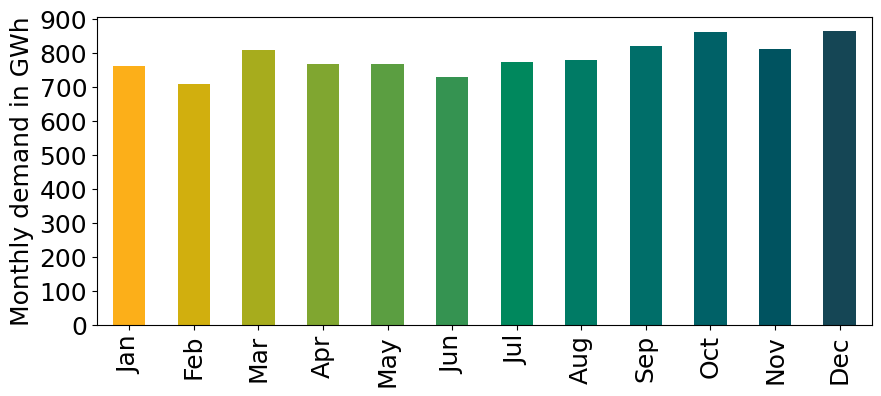

In [126]:
import calendar

colors = ['#fcaf19',
'#d1af0e',
'#a7ac1d',
'#80a630',
'#5b9e41',
'#359351',
'#00885d',
'#007b65',
'#006e69',
'#006167',
'#005360',
'#154655']
demand_2021 = pd.read_excel('c:/Users/marih/test4/pypsa-earth/data/demand_2021.xlsx')
demand_2021.Consumption[0:12].plot.bar(figsize = (10,4), color = colors)
months = np.arange(0, 12)
plt.xticks(months, calendar.month_abbr[1:])
#plt.ylim(0,900)
plt.ylabel('Monthly demand in GWh')

# Make the y-axis more detailed
plt.yticks(np.arange(0, 1000, 100))